## Assignment week 8 - NLTK High Frequency Words

Perform an analysis of high frequency words in a corpus of interest.

Complete these tasks:

1. Choose a corpus of interest.
2. How many total unique words are in the corpus? (Please feel free to define unique words in any interesting,
defensible way).
3. Taking the most common words, how many unique words represent half of the total words in the corpus?
4. Identify the 200 highest frequency words in this corpus.
5. Create a graph that shows the relative frequency of these 200 words.
6. Does the observed relative frequency of these words follow Zipf’s law? Explain.
7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”


In [38]:
import nltk
%matplotlib inline

import pandas as pd
import seaborn as sns

/home/bsnacks/.local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


### Choose Corpus and Find Unique Words

For this assignment, I chose the shakespeare-macbeth corpus from the nltk package. I am going to define unique words as the set of unique alphabetic strings in the corpus. This will include common stop words such as 'a' and 'the', but will remove numbers and punctuation from the corpus. The length of the set is taken to survey the number of unique words.

In [11]:
mb = nltk.corpus.gutenberg.words('shakespeare-macbeth.txt')

## strip punctuation and numerics using isalpha() method
mb = [w for w in mb if w.isalpha()]

In [15]:
## How many total unique words are in the corpus

unique_mb = set(mb)
len(unique_mb)

4000

### Most Common Words and building a Frequency Distribution

Here we build a frequency distribution from the corpus and isolate the 200 most common words. This method returns the a sort list of tuples that is then loaded into a dataframe in order to calculate relative frequencies.



In [56]:
## build the frequency distribution using FreqDist()
mb_freq = nltk.FreqDist(mb)

## make a dataframe to produce relative frequencies
top_mb = pd.DataFrame(mb_freq.most_common(200),columns=['word','count'])
top_mb['rel_freq'] = top_mb['count']/float(len(mb))

top_mb.head(5)

,word,count,rel_freq
0,the,531,0.029061
1,and,376,0.020578
2,I,333,0.018225
3,of,315,0.017239
4,to,311,0.017021


We want to find out the number of most common unique words that make up approximately 50% of the dataset. The total number of words is 18,272 and half of that is 9136. By plotting the cumulative distribution we can see that approximately 125 words accounts for 50% of all words in the dataset. This is confirmed by summing the first 125 indexes of relative frequencies.

In [16]:
len(mb)

18272

In [22]:
len(mb)/2.0   ## half of all words

9136.0

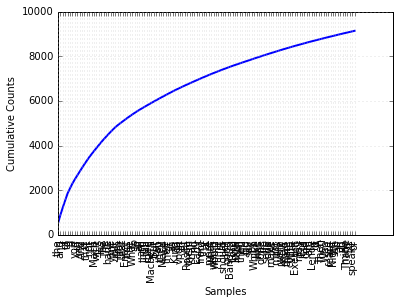

In [33]:
mb_freq.plot(125, cumulative=True) 

In [59]:
sum(top_mb[:125]['rel_freq']) # The first 125 words account for approximately half of all words

0.50049255691768835

The following barplot shows the relative frequencies of all 200 of the most frequent unique words.

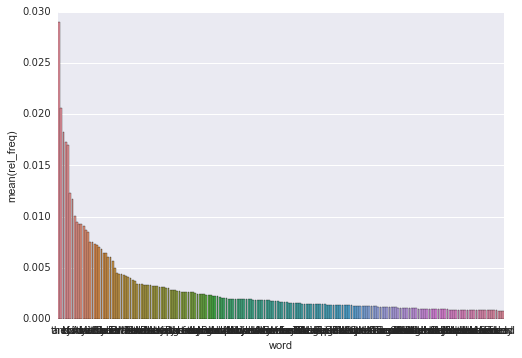

In [42]:
g = sns.barplot(x=top_mb.word, y=top_mb.rel_freq)


The observed relative frequencies do follow Zipf's Law, in that the frequency of any word is (approximately) inversely proportional to its ranking in the frequency table.  This law holds for all words in all corpi, the only differences being the words themselves, which differ based on the content of the corpus being analyzed.